Now that you've explored the concepts behind going from binary classification to multi class classification, it's time for another Exercise. In this one you'll use the Sign Language dataset from https://www.kaggle.com/datamunge/sign-language-mnist, and attempt to build a multi-class classifier to recognize sign language!

Let's build a multi-class classifier to recognize sign language!

**NOTE: Please do not alter any of the provided code in the exercise. Only add your own code where indicated. Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position. Please use the provided epoch values when training. Once you have completed your notebook assignment and received a final score, please save your notebook, run the final cell, and close your Jupyter Workspace. This will help optimize your Jupyter workspace performance for future assessments. Please note that this step will shut down your kernel, so it is important to save your work in advance of completing this step**

In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os

print(os.getcwd())

/Users/hhi/New_Programming/Tensorflow Certificate/Course_2


In [2]:
%pwd

u'/Users/hhi/New_Programming/Tensorflow Certificate/Course_2'

In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    # Your code starts here
        file = csv.reader(training_file, delimiter=',')
        next(file)
        images = []
        labels = []
        for row in file:
            labels.append(float(row[0]))
            image = np.array(np.array_split(row[1:],28))
            images.append(image)
        images = np.array(images).astype('float')
        labels = np.array(labels).astype('float')
      # Your code ends here
    return images, labels


# 원래 코드에서는 getcwd 로 되어있었으나, 이미 그 경로 안에 이 파일들이 있기 때문에 별로 건들건 없고 바로 불러오면 되는 것이다. 

path_sign_mnist_train = "sign_mnist_train.csv"
path_sign_mnist_test = "sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

IndentationError: unindent does not match any outer indentation level (<ipython-input-3-e19e92016fd7>, line 29)

In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, 3)# Your Code Here
testing_images = np.expand_dims(testing_images, 3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True,
                                   fill_mode = 'nearest'
    # Your Code Here
    )

validation_datagen = ImageDataGenerator( rescale = 1./255)
    # Your Code Here)
    
# Keep These
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

NameError: name 'training_images' is not defined

In [14]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
from tensorflow.keras.optimizers import RMSprop


model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(25, activation = 'softmax')
                                    
    # Your Code Here
                                   ])

# Compile Model. 

model.compile(optimizer = RMSprop(lr=0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])# Your Code Here)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size = 5),
                              epochs = 2, verbose = 1,
                              validation_data = validation_datagen.flow(testing_images, testing_labels)
                             )# Your Code Here (set 'epochs' = 2))

model.evaluate(testing_images, testing_labels, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5491 steps, validate for 225 steps
Epoch 1/2
5491/5491 [==============================] - 28s 5ms/step - loss: 2.5869 - acc: 0.2026 - val_loss: 1.6699 - val_acc: 0.4354
Epoch 2/2
5491/5491 [==============================] - 28s 5ms/step - loss: 1.9214 - acc: 0.3873 - val_loss: 1.1800 - val_acc: 0.5701


UnimplementedError:  Cast string to float is not supported
	 [[node Cast (defined at <ipython-input-14-2c48735831bd>:30) ]] [Op:__inference_distributed_function_58080]

Function call stack:
distributed_function


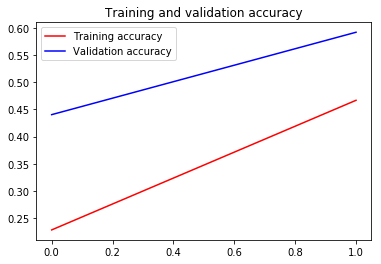

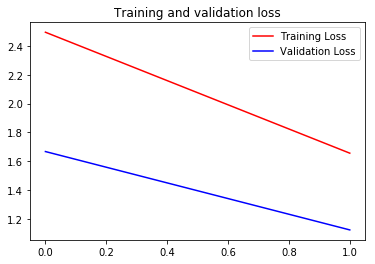

In [8]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']# Your Code Here
val_acc = history.history['val_acc']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);